<a href="https://colab.research.google.com/github/rickyC3/CIFAR10--/blob/main/CIFAR%E5%9C%96%E7%89%87%E8%BE%A8%E8%AD%98_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#import os
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import cifar10

In [26]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [27]:
print(type(x_img_train))
print(x_img_train.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


In [28]:
x_img_train_normalize = x_img_train.astype('float32')/255.0 #正規化(RGB_MAX --> 225)
x_img_test_normalize = x_img_test.astype('float32')/255.0

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

print(x_img_train[0][0][0])
print(x_img_train_normalize[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [50]:

model = Sequential()#使用線性stack模型

model.add(Conv2D(filters = 100,kernel_size = (3,3),input_shape = (32,32,3),activation = 'relu',padding = 'same'))#設定卷積層參數
model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))
#model.add(MaxPool2D(pool_size = (2,2)))#設定池化大小2*2

model.add(Conv2D(filters = 500 ,kernel_size = (3,3),activation = 'relu',padding = 'same'))

model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))


model.add(Conv2D(filters = 1000 ,kernel_size = (2,2),activation = 'relu',padding = 'same'))

model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))


#model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = "same"))

#將神經網路轉換成一維資料

model.add(Flatten())
#設定神經網路神經元和激發函數
model.add(Dense(1024,activation='relu'))
#model.add(Dropout(rate=0.25)) # prevent to over-fit
model.add(Dense(1024, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(1024, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dropout(rate = 0.25))
model.add(Dense(1024, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(10, activation='softmax'))


In [51]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 100)       2800      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 10, 10, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 10, 500)       450500    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 500)        0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 1000)        2001000   
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 1, 1, 1000)      

In [52]:

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,validation_split=0.2,epochs=25, batch_size=128, verbose=1) 


Epoch 1/25
313/313 [==============================] - 10s 25ms/step - loss: 3.5389 - accuracy: 0.1763 - val_loss: 1.9461 - val_accuracy: 0.2045
Epoch 2/25
313/313 [==============================] - 7s 23ms/step - loss: 1.8511 - accuracy: 0.2320 - val_loss: 1.8877 - val_accuracy: 0.2476
Epoch 3/25
313/313 [==============================] - 7s 23ms/step - loss: 1.6519 - accuracy: 0.3547 - val_loss: 1.5706 - val_accuracy: 0.4278
Epoch 4/25
313/313 [==============================] - 7s 23ms/step - loss: 1.4217 - accuracy: 0.4710 - val_loss: 1.3233 - val_accuracy: 0.5255
Epoch 5/25
313/313 [==============================] - 7s 23ms/step - loss: 1.2340 - accuracy: 0.5635 - val_loss: 1.2448 - val_accuracy: 0.5820
Epoch 6/25
313/313 [==============================] - 7s 23ms/step - loss: 1.0877 - accuracy: 0.6275 - val_loss: 1.0959 - val_accuracy: 0.6327
Epoch 7/25
313/313 [==============================] - 7s 23ms/step - loss: 0.9776 - accuracy: 0.6713 - val_loss: 1.0487 - val_accuracy: 0.650

In [53]:

scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot)


313/313 [==============================] - 2s 5ms/step - loss: 1.6092 - accuracy: 0.7038


In [33]:
print(len(scores))
print(scores)

2
[1.3848398923873901, 0.7253999710083008]


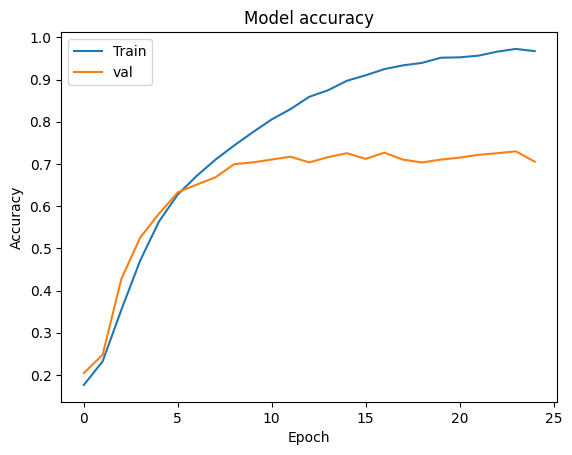

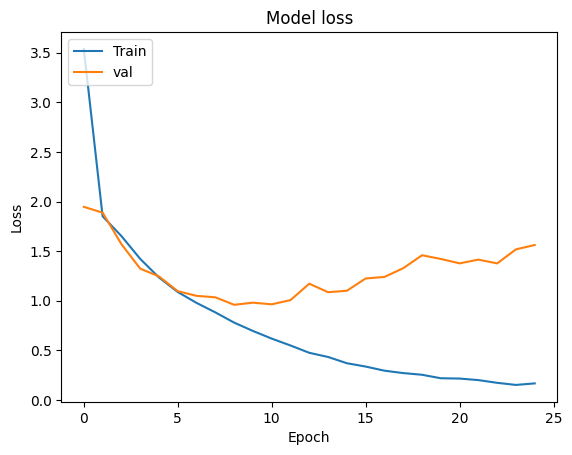

In [54]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [35]:
y_test_pre = model.predict(x_img_test_normalize)

313/313 [==============================] - 1s 3ms/step


In [36]:
y_label_test_OneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [37]:
y_test_pre

array([[1.07552645e-04, 6.45544555e-04, 8.63986555e-03, ...,
        3.76812415e-04, 6.10639690e-04, 1.18919888e-04],
       [9.28053652e-08, 4.60375577e-06, 6.62521982e-11, ...,
        4.32056680e-13, 9.99995232e-01, 1.37151559e-07],
       [3.23620363e-04, 2.73790683e-05, 2.38643656e-06, ...,
        1.40254102e-07, 9.99607027e-01, 3.40866063e-05],
       ...,
       [1.50825343e-07, 2.25204118e-07, 1.37491282e-02, ...,
        1.59861338e-06, 3.61982387e-07, 1.41753729e-08],
       [7.95845244e-06, 9.99967337e-01, 7.64005165e-07, ...,
        4.42034161e-06, 1.98983503e-06, 6.50352013e-06],
       [1.71571879e-09, 6.51342418e-07, 2.50651652e-07, ...,
        9.99820650e-01, 1.03898601e-09, 3.16113329e-07]], dtype=float32)

In [38]:
def show(x_img, i):
  plt.figure(figsize = (2,2))
  plt.imshow(x_img[i])
  plt.show()



error
(array([2]),) [6]


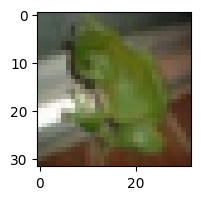

error
(array([3]),) [5]


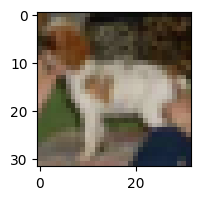

error
(array([4]),) [5]


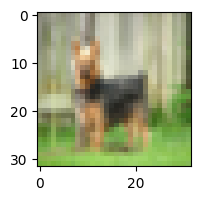

error
(array([2]),) [5]


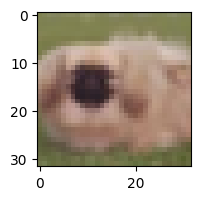

error
(array([8]),) [4]


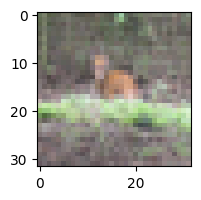

error
(array([8]),) [2]


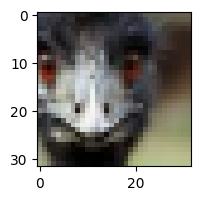

error
(array([9]),) [1]


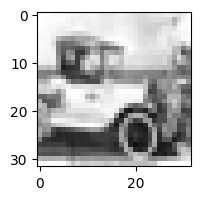

error
(array([2]),) [5]


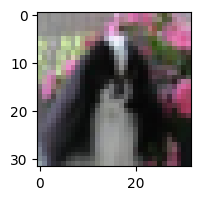

error
(array([5]),) [3]


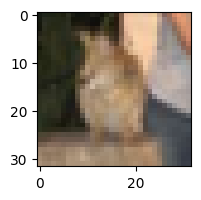

error
(array([2]),) [9]


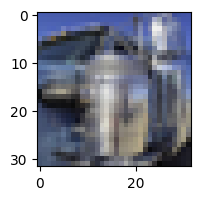

In [55]:
#輸出圖片辨識錯誤的圖
cnt = 0
for i in range(1,len(y_test_pre)):
  ans = np.max(y_test_pre[i])
  ans = np.where(y_test_pre[i] == ans)
  #print(ans, y_label_test[i])
  if (ans != y_label_test[i]):
    print("error")
    print(ans, y_label_test[i])
    cnt+=1
    show(x_img_test, i)
  if (cnt == 10):break

In [40]:
"""
  0	airplane
  1	automobile
  2	bird
  3	cat
  4	deer
  5	dog
  6	frog
  7	horse
  8	ship
  9	truck
"""

'\n  0\tairplane\n  1\tautomobile\n  2\tbird\n  3\tcat\n  4\tdeer\n  5\tdog\n  6\tfrog\n  7\thorse\n  8\tship\n  9\ttruck\n'